<a href="https://colab.research.google.com/github/Salma-Elmahallawy/Sign-Language-Translator/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from google.colab import drive
import pathlib

## Import Data

In [ ]:
# Load the Drive helper and mount
# This will prompt for authorization.
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%ls
%cd /content/gdrive/My Drive/Sign Language Translation AI Project
data_dir = "trainingData2"
data_dir = pathlib.Path(data_dir)

gdrive/  sample_data/
/content/gdrive/.shortcut-targets-by-id/1SuPkvwYU9KXSTMS0rF2WtyWcfPY2ior9/Sign Language Translation AI Project


## Create Dataset

In [ ]:
batch_size = 52
img_height = 180
img_width = 180

#use 80% of the images for training, and 20% for validation.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#show classes
class_names = train_ds.class_names
print(class_names)

Found 33900 files belonging to 51 classes.
Using 27120 files for training.
Found 33900 files belonging to 51 classes.
Using 6780 files for validation.
['1', '3', '4', '5', '7', '8', '9', 'A', 'B', 'Baby', 'Brother', 'C', 'D', 'Dont_like', 'E', 'F', 'Friend', 'G', 'H', 'Help', 'House', 'I', 'J', 'K', 'L', 'Like', 'Love', 'M', 'Make', 'More', 'N', 'Name', 'No', 'O_OR_0', 'P', 'Pay', 'Play', 'Q', 'R', 'S', 'Stop', 'T', 'U', 'V_OR_2', 'W_OR_6', 'With', 'X', 'Y', 'Yes', 'Z', 'nothing']


In [ ]:
def cv2_func(image, label):
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB)

def tf_cv2_func(image, label):
    [image, label] = tf.py_function(cv2_func, [image, label], [tf.float32, tf.float64])
    return image, label

#train_ds = train_ds.map(tf_cv2_func)

## Visualize the Data

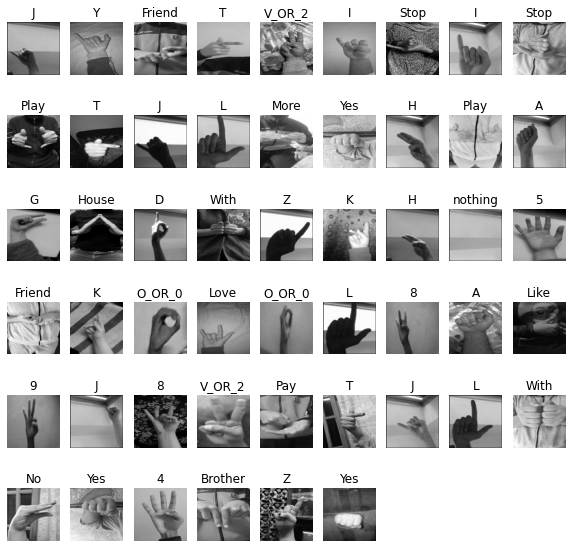

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(51):
   ax = plt.subplot(6, 9, i + 1)
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.title(class_names[labels[i]])
   plt.axis("off")

## Create the Model

In [ ]:
num_classes=len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

## Training

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

NameError: ignored

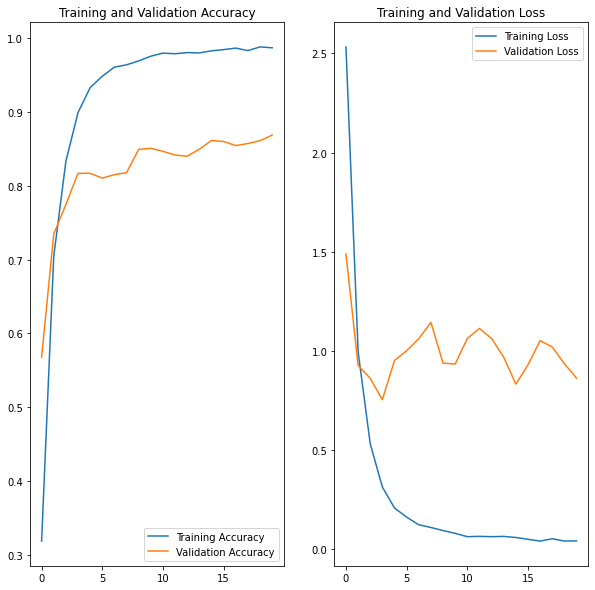

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing

In [ ]:
%cd /content/gdrive/My Drive/Sign Language Translation AI Project/asl_test
%ls

/content/gdrive/.shortcut-targets-by-id/1SuPkvwYU9KXSTMS0rF2WtyWcfPY2ior9/Sign Language Translation AI Project/asl_test
A_test.jpg          G_test.jpg      Name_test.jpg     space_test.jpg
Baby_test.jpg       Help_test.jpg   NINE_test.jpg     S_test.jpg
Brother_test.jpg    House_test.jpg  No_test.jpg       Stop_test.jpg
B_test.jpg          H_test.jpg      nothing_test.jpg  THREE_test.jpg
C_test.jpg          I_test.jpg      N_test.jpg        T_test.jpg
Dont_like_test.jpg  J_test.jpg      ONE_test.jpg      U_test.jpg
D_test.jpg          K_test.jpg      O_test.jpg        V_test.jpg
EIGHT_test.jpg      Like_test.jpg   Pay_test.jpg      With_test.jpg
E_test.jpg          Love_test.jpg   Play_test.jpg     W_test.jpg
FIVE_test.jpg       L_test.jpg      P_test.jpg        X_test.jpg
FOUR_test.jpg       Make_test.jpg   Q_test.jpg        Yes_test.jpg
Friend_test.jpg     More_test.jpg   R_test.jpg        Y_test.jpg
F_test.jpg          M_test.jpg      SEVEN_test.jpg    Z_test.jpg


In [ ]:
%cd /content/gdrive/My Drive/Sign Language Translation AI Project/asl_test
img = keras.preprocessing.image.load_img(
    'Z_test.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

/content/gdrive/.shortcut-targets-by-id/1SuPkvwYU9KXSTMS0rF2WtyWcfPY2ior9/Sign Language Translation AI Project/asl_test
This image most likely belongs to Z with a 100.00 percent confidence.


With good performance: A, B, Baby, Brother, C, D, E, 5, 4, Friend, F, Help, House, H, I, J, Like, Love, L, Make, More, M, Name, nothing, N, 1, O, Pay, Play, P, Q, R, 7, S, Stop, 3, U, With, W, Yes, Y, Z. 

Total: 42
Rate: 42/51 = 82.35%

#### With good performance (testData_qiao): A, Baby, C, Dont_like, 4, House, I, Make, More, 9, Play, 7,  3, T, V, W, Z.

#####Total: 17
#####Rate: 17/51 =33.33%

## Save and load model

 Resource: https://stackoverflow.com/questions/42763094/how-to-save-final-model-using-keras

 https://deeplizard.com/learn/video/7n1SpeudvAE

In [ ]:
print("Original model:", model)

Original model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f2c030f82d0>


###1. model.save()

In [ ]:
filepath= '/content/gdrive/My Drive/Sign Language Translation AI Project/Model3'

In [ ]:
%cd '/content/gdrive/My Drive/Sign Language Translation AI Project/Model3'

/content/gdrive/.shortcut-targets-by-id/1SuPkvwYU9KXSTMS0rF2WtyWcfPY2ior9/Sign Language Translation AI Project/Model3


In [ ]:
import os.path
model.save('Model3/model.h5')

In [ ]:
%ls '/content/gdrive/My Drive/Sign Language Translation AI Project/Model3/Model3'

asl_model.h5  model.h5


#### Load model

In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('Model3/model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
new_model.get_weights()

###2. model.to_json

In [ ]:
% cd /content/gdrive/My Drive/Sign Language Translation AI Project/Model3

/content/gdrive/.shortcut-targets-by-id/1SuPkvwYU9KXSTMS0rF2WtyWcfPY2ior9/Sign Language Translation AI Project/Model3


In [ ]:
# save as JSON   (only the architecture)
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()


In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 180, 180, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "rescaling_input"}}, {"class_name": "Rescaling", "config": {"name": "rescaling", "trainable": true, "batch_input_shape": [null, 180, 180, 3], "dtype": "float32", "scale": 0.00392156862745098, "offset": 0.0}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "filters": 16, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "

In [ ]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### 3.model.save_weights() - not apply

In [ ]:
model.save_weights('Model2/asl_model_weights.h5')

In [ ]:
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model2.get_weights()

In [ ]:
model2.load_weights('Model2/asl_model_weights.h5')